## Librerías

In [14]:
# Determinadas
import numpy as np
import pandas
import matplotlib.pyplot as plt
import random

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles,make_blobs
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Procesamiento de imágenes
import matplotlib.image as pmimg
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import cv2
import os
from numpy import mean
from numpy import std


# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr



## Recolección de datos

In [15]:
imgMX20N = []
imgMX50N = []
imgMX100N = []
imgMX200N = []

for folderName in os.listdir('datasets'):
     # Billetes de 20
    if folderName.startswith("20 Billetes"):
        for fileName in os.listdir('datasets/' + folderName ):
            img = cv2.imread('datasets/' + folderName + '/' + fileName)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            imgMX20N.append(img)
    # Billetes de 50
    elif folderName.startswith("50 Billetes"):
        for fileName in os.listdir('datasets/' + folderName ):
            img = cv2.imread('datasets/' + folderName + '/' + fileName)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            imgMX50N.append(img)
    # Billetes de 100
    elif folderName.startswith("100 Billetes"):
        for fileName in os.listdir('datasets/' + folderName ):
            img = cv2.imread('datasets/' + folderName + '/' + fileName)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            imgMX100N.append(img)
    # Billetes de 200
    elif folderName.startswith("200 Billetes"):
        for fileName in os.listdir('datasets/' + folderName ):
            img = cv2.imread('datasets/' + folderName + '/' + fileName)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
            imgMX200N.append(img)


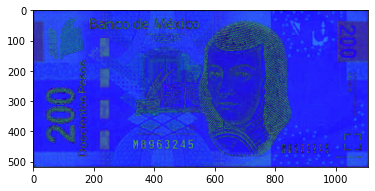

In [16]:
plt.figure()
plt.imshow(imgMX200N[0])
plt.show()

## Estructuración de datos

In [17]:
# imgMX20N
# imgMX50N
# imgMX100N
# imgMX200N

billName = ["0", "1", "2", "3"]
binsNumber = 18
data = []

# 20 pesos
for i in imgMX20N:
    nrows, ncols, nch = i.shape
    
    Xi = np.reshape(i, (nrows*ncols,3))
    
    h = np.histogram(Xi[:,0], bins=binsNumber, range=[0,180], density=True)[0] * 1000
    
    h = np.append(h, billName[0])
    data.append(h)
    
    
# 50 pesos
for i in imgMX50N:
    nrows, ncols, nch = i.shape
    
    Xi = np.reshape(i, (nrows*ncols,3))
    
    h = np.histogram(Xi[:,0], bins=binsNumber, range=[0,180], density=True)[0] * 1000
    
    h = np.append(h, billName[1])
    data.append(h)
    

# 100 pesos
for i in imgMX100N:
    nrows, ncols, nch = i.shape
    
    Xi = np.reshape(i, (nrows*ncols,3))
    
    h = np.histogram(Xi[:,0], bins=binsNumber, range=[0,180], density=True)[0] * 1000
    
    h = np.append(h, billName[2])
    data.append(h)
    
    
# 200 pesos
for i in imgMX200N:
    nrows, ncols, nch = i.shape
    
    Xi = np.reshape(i, (nrows*ncols,3))
    
    h = np.histogram(Xi[:,0], bins=binsNumber, range=[0,180], density=True)[0] * 1000
    
    h = np.append(h, billName[3])
    data.append(h)




## Crear el dataset a usar en Spyder

In [18]:
random.shuffle(data)
df = pandas.DataFrame(data)
df

df.to_csv("datasetToUse/dataset.csv")

## Cargar dataset

In [25]:
df = pandas.read_csv("datasetToUse/dataset.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0.893687,4.152633,51.046926,36.269581,4.849320,1.089422,0.761458,0.092892,0.034597,0.089732,0.026856,0.056398,0.134914,0.065561,0.083413,0.095577,0.140759,0.116272,3
1,1,31.813576,1.683988,0.110698,0.118346,0.014913,0.031355,0.015486,0.037855,0.022178,0.035370,0.004206,0.002294,0.010515,0.003633,0.022943,1.071229,10.598535,54.402880,1
2,2,0.668725,21.626519,56.851544,18.350827,1.826078,0.280728,0.106320,0.044392,0.026067,0.065245,0.009637,0.016272,0.035861,0.012796,0.010269,0.021959,0.024803,0.021959,3
3,3,32.370864,37.001235,18.583364,2.429819,0.187067,0.075268,0.027399,0.061253,0.027871,0.148331,0.071016,0.085975,0.069914,0.020155,0.037634,0.043775,0.051176,8.707886,2
4,4,0.539077,0.509109,15.122556,63.157207,14.307842,3.843929,1.997233,0.105934,0.055755,0.048959,0.024567,0.037112,0.109593,0.017598,0.024044,0.058717,0.027180,0.013590,3


## Segmentar datos en X y Y

In [26]:
X = df.loc[:,'0':'17']
Y = df.loc[:,'18']
X = X.values
Y = Y.values

## Entrenar modelo

[2 1 2 3 2 2 3 2 2 2 3 2 1 3 2 3 3 2 3 2 0 1 2 3 3 3 3 3 3 3 1 2 3 0 3 2 2
 3 2 3 0 3 1 1 3 2 3 2 0 3 3 2 2 3 1 2 0 2 0 3 3 3 3 1 1 3 2 3 3 2 3 2 2 3
 0 2 1 3 2 3 1 0 2 3 1 3 2 3 2 3 2 2 3 1 3 3 2 3 2 2 3 3 3 3 0 2 1 2 3 1 2
 3 0 3 2 2 2 1 3 3 1 3 3 3 1 2 0 3 3 3 3 0 2 2 3 1 1 1 3 3 3 0 3 2 1 3 2 3
 3 1 2 0 2 0 1 3 0 2 3 0 3 2 2 3 2 0 2 3 3 3 3 1 2 3 2 3 0 3 0 1 2 1 1 3 3
 1 3 0 1 3 3 1 2 2 2 3 0 2 3 1 1 3 1 2 3 2 2 2 0 2 1 1 1 2 3 3 3 3 3 2 2 3
 3 3 1 1 3 3 2 1 2 3 0 2 2 0 1 3 2 2 3]
MAE: 0.0
MSE: 0.0
R2 score: 1.0


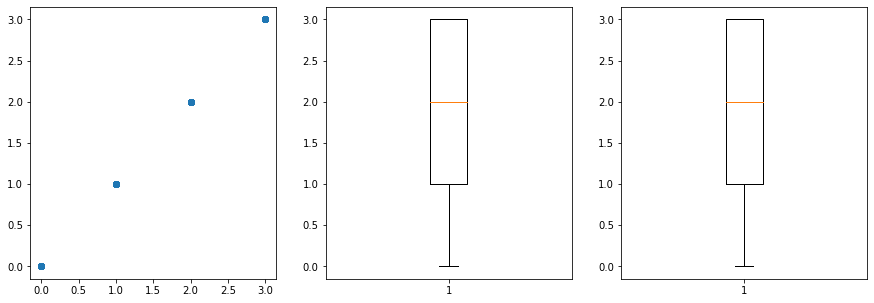

In [27]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=0)
model = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs', penalty='l2', max_iter=100000)
model.fit(Xtrain, Ytrain)
Ypred = model.predict(Xtest)

print(Ypred)

print('MAE:', mean_absolute_error(Ytest, Ypred))
print('MSE:', mean_squared_error(Ytest, Ypred))
print('R2 score:', r2_score(Ytest, Ypred))


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter( Ytest, Ypred )

plt.subplot(1,3,2)
plt.boxplot(Ytest)

plt.subplot(1,3,3)
plt.boxplot(Ypred)

plt.show()

## Ejemplos de predicción

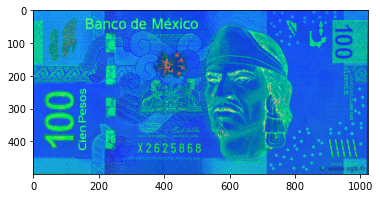

In [28]:
img = cv2.imread('datasetsExample/100a1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure()
plt.imshow(img)
plt.show()

100.0


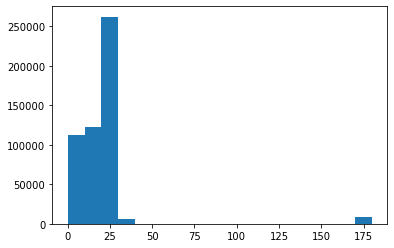

In [29]:
nrows, ncols, nch = img.shape

Xi = np.reshape(img, (nrows*ncols,3))

h = np.histogram(Xi[:,0], bins=18, range=[0,180], density=True)[0] * 1000
print(np.sum(h))

plt.figure()
plt.hist(Xi[:,0],bins=18, range=[0,180])
plt.show()

In [30]:
h = h.reshape(1,-1)
print(len(h[0]))
print(h)
ans = model.predict(h)
print(ans)

18
[[2.19179688e+01 2.39345703e+01 5.12064453e+01 1.29238281e+00
  4.39453125e-02 4.49218750e-03 5.85937500e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.90625000e-04 1.56250000e-03
  3.76953125e-02 1.55996094e+00]]
[2]
